# Start From Here

In [7]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt

DATASET_PATH = 'data/LFM_2b_seperated_final/'
interactions = pd.read_csv(os.path.join(DATASET_PATH, '10k_sampled_interactions.csv'))
user_demographics = pd.read_csv(os.path.join(DATASET_PATH, '10k_sampled_users.csv'))
item_demographics = pd.read_csv(os.path.join(DATASET_PATH, 'item_demographics.csv'))

In [8]:
# run  drop duplicates on all 3 dataframes

print('int', len(interactions))
interactions = interactions.drop_duplicates()
print('int', len(interactions))

print('us', len(user_demographics))
user_demographics = user_demographics.drop_duplicates()
print('us', len(user_demographics))

print('it', len(item_demographics))
item_demographics = item_demographics.drop_duplicates()
print('it', len(item_demographics))

int 10520266
int 10520266
us 9856
us 9856
it 6321172
it 6321172


In [6]:
# save the new dataframes as they replace their older versions

interactions.to_csv(os.path.join(DATASET_PATH, '10k_sampled_interactions.csv'), index=False)
user_demographics.to_csv(os.path.join(DATASET_PATH, '10k_sampled_users.csv'), index=False)
item_demographics.to_csv(os.path.join(DATASET_PATH, 'item_demographics.csv'), index=False)

In [1]:
PATH = 'data/LFM_2b_seperated_final/'
NROWS = 5000000 # 1,000,000, 2s, 6s - 5,000,000, 8s, 90s, 210s (2->4->8, 6 ->4**2->90)
interactions = pd.read_csv(os.path.join(PATH, 'interactions.csv'), nrows=10*NROWS)
user_demographics = pd.read_csv(os.path.join(PATH, 'user_demographics.csv'), nrows=NROWS)
item_demographics = pd.read_csv(os.path.join(PATH, 'item_demographics.csv'), nrows=NROWS)

df_final = interactions.merge(user_demographics, on='user_id', how='inner')
df_final = df_final.merge(item_demographics, on='track_id', how='inner')
df_final.head()

In [ ]:
# delete user_id and track_id and user_age columns
# sample on n of users

df_final = df_final.drop(['user_id', 'track_id'], axis=1)
# group age of users into 4 groups
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '18-30', '30-50', '50+']
df_final['user_age'] = pd.cut(df_final['user_age'], bins=bins, labels=labels, right=False)

df_final_grouped = df_final.groupby(['user_country', 'user_gender', 'user_age', 'artist_gender', 'artist_country']).sum().reset_index()
df_final_grouped.head()

In [95]:
df_final_grouped = pd.read_csv(os.path.join('data/', 'processed_df_sample_final.csv'))

In [100]:
df_final_grouped.loc[df_final_grouped['count'] > 0].sort_values(by='count', ascending=False).head(10)

,user_country,user_gender,user_age,artist_gender,artist_country,count
718305,US,m,18-30,m,US,189296428
710433,UK,m,18-30,m,US,89994829
556929,PL,m,18-30,m,US,70082073
88545,BR,m,18-30,m,US,69491571
592353,RU,m,18-30,m,US,57837206
167265,DE,m,18-30,m,US,56809665
716993,US,f,18-30,m,US,54016603
718633,US,m,30-50,m,US,50607119
88381,BR,m,18-30,f,US,47980333
718210,US,m,18-30,m,GB,47053209


In [101]:
df_culminated = df_final_grouped.groupby(['user_country', 'artist_country']).agg({'count': 'sum'}).reset_index()
df_culminated.head(10)

,user_country,artist_country,count
0,AD,AD,0
1,AD,AF,0
2,AD,AG,0
3,AD,AI,0
4,AD,AL,0
5,AD,AM,0
6,AD,AO,0
7,AD,AR,91
8,AD,AT,1726
9,AD,AU,7383


In [102]:
len(df_culminated.loc[df_culminated['count'] > 0]) / len(df_culminated) 
# only 37% pair interaction

0.37049647146217657

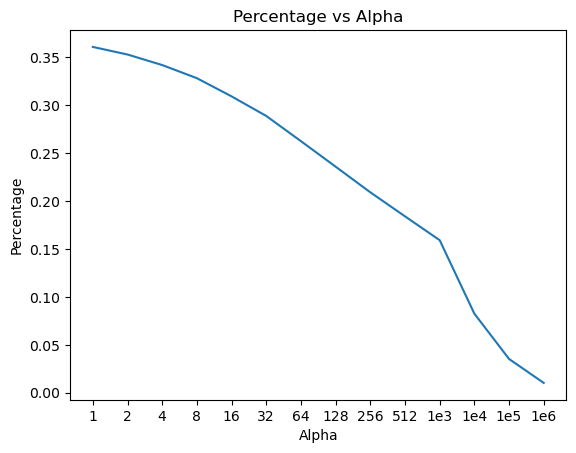

In [103]:
import matplotlib.pyplot as plt

arr = []
for alpha in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1e3, 1e4, 1e5, 1e6]:
    arr.append(len(df_culminated.loc[df_culminated['count'] > alpha]) / len(df_culminated))



plt.plot(arr)
plt.xlabel('Alpha')
plt.ylabel('Percentage')
plt.title('Percentage vs Alpha')
plt.xticks(range(len(arr)), [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, '1e3', '1e4', '1e5', '1e6'])

plt.show()

In [104]:
df_culminated.head()

,user_country,artist_country,count
0,AD,AD,0
1,AD,AF,0
2,AD,AG,0
3,AD,AI,0
4,AD,AL,0


In [105]:
df_culminated

,user_country,artist_country,count
0,AD,AD,0
1,AD,AF,0
2,AD,AG,0
3,AD,AI,0
4,AD,AL,0
...,...,...,...
32303,ZW,XG,0
32304,ZW,XW,0
32305,ZW,YU,0
32306,ZW,ZA,0


In [106]:
# add the number of counts of 'artist_country' where 'user_country' is the same as 'artist_country' and also 'user_country' is different from 'artist_country'

df_temp1 = df_culminated[df_culminated['artist_country'] == df_culminated['user_country']].groupby(['artist_country']).agg({'count': 'sum'}).reset_index().sort_values(by='count', ascending=False).rename(columns={'count': 'count_same'})
df_temp2 = df_culminated[df_culminated['artist_country'] != df_culminated['user_country']].groupby(['artist_country']).agg({'count': 'sum'}).reset_index().sort_values(by='count', ascending=False).rename(columns={'count': 'count_diff'})

artists_count = df_temp1.merge(df_temp2, on='artist_country', how='inner')
artists_count['count'] = artists_count['count_same'] + artists_count['count_diff']
artists_count = artists_count.sort_values(by='count', ascending=False).reset_index(drop=True)
artists_count.head()

,artist_country,count_same,count_diff,count
0,US,446930248,1759931260,2206861508
1,CA,6147281,212662031,218809312
2,FR,8506530,140228750,148735280
3,DE,19558690,113199464,132758154
4,AU,2387932,72953257,75341189


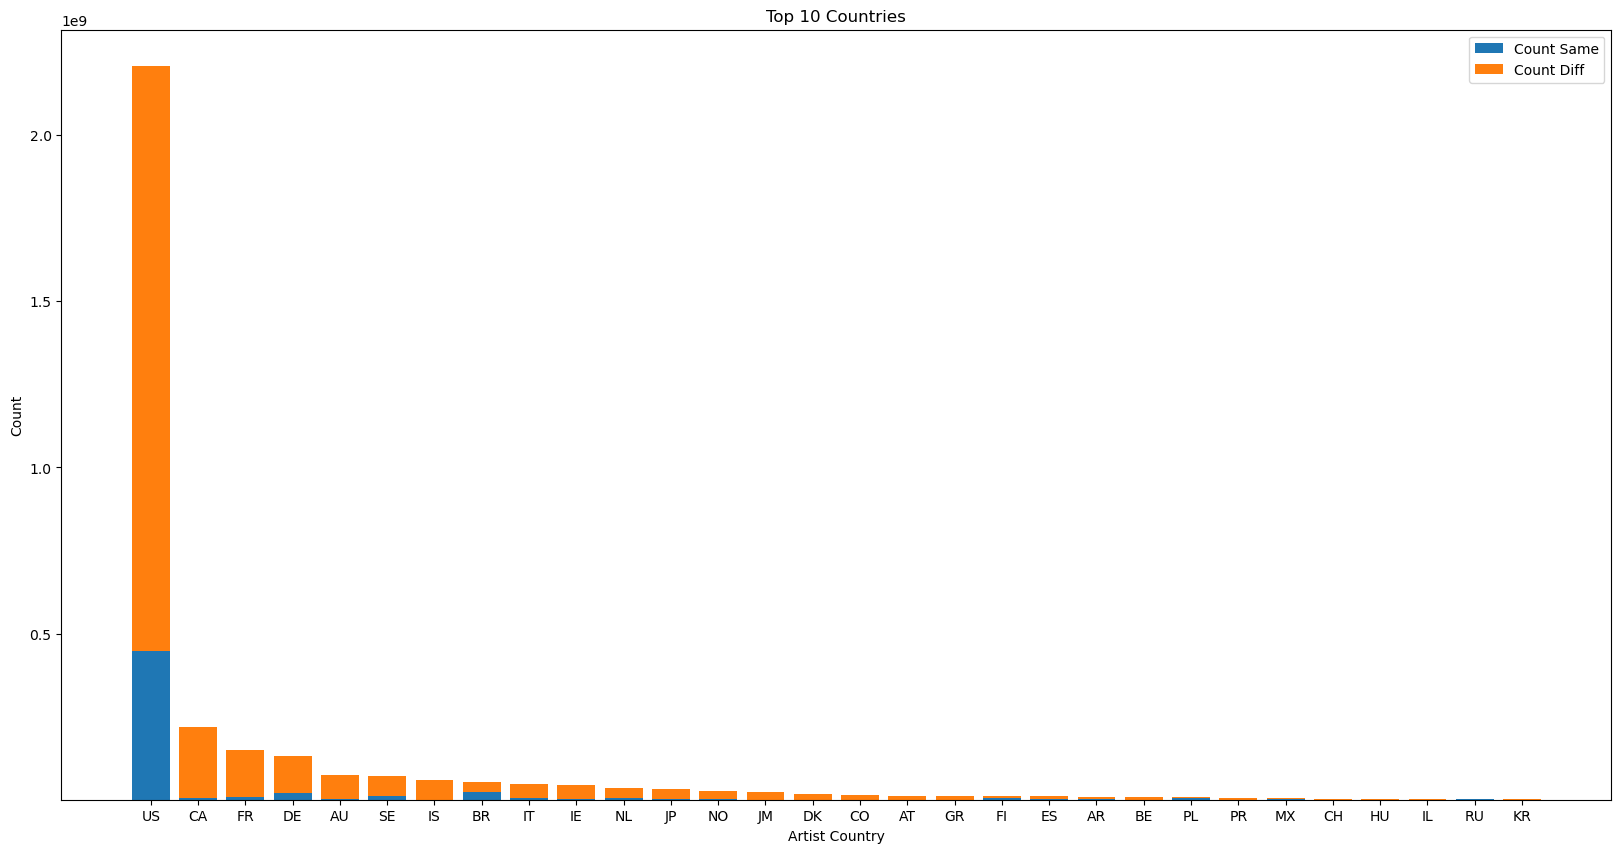

In [107]:
# bar plot of top 10 countries
N_FIRST = 30
plt.figure(figsize=(20, 10))
plt.bar(artists_count['artist_country'].head(N_FIRST), artists_count['count_same'].head(N_FIRST), label='Count Same')
plt.bar(artists_count['artist_country'].head(N_FIRST), artists_count['count_diff'].head(N_FIRST), bottom=artists_count['count_same'].head(N_FIRST), label='Count Diff')
plt.xlabel('Artist Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.legend()
plt.show()


In [122]:
artists_count.head()

,artist_country,count_same,count_diff,count
0,US,446930248,1759931260,2206861508
1,CA,6147281,212662031,218809312
2,FR,8506530,140228750,148735280
3,DE,19558690,113199464,132758154
4,AU,2387932,72953257,75341189


In [126]:
artists_count['locality'] = artists_count['count_same'] / artists_count['count']
artists_count = artists_count[['artist_country', 'locality', 'count']].sort_values(by='locality', ascending=False).reset_index(drop=True)
artists_count = artists_count[artists_count['count'] > 100]

Text(0, 0.5, 'proporiton of local listeners to global listeners')

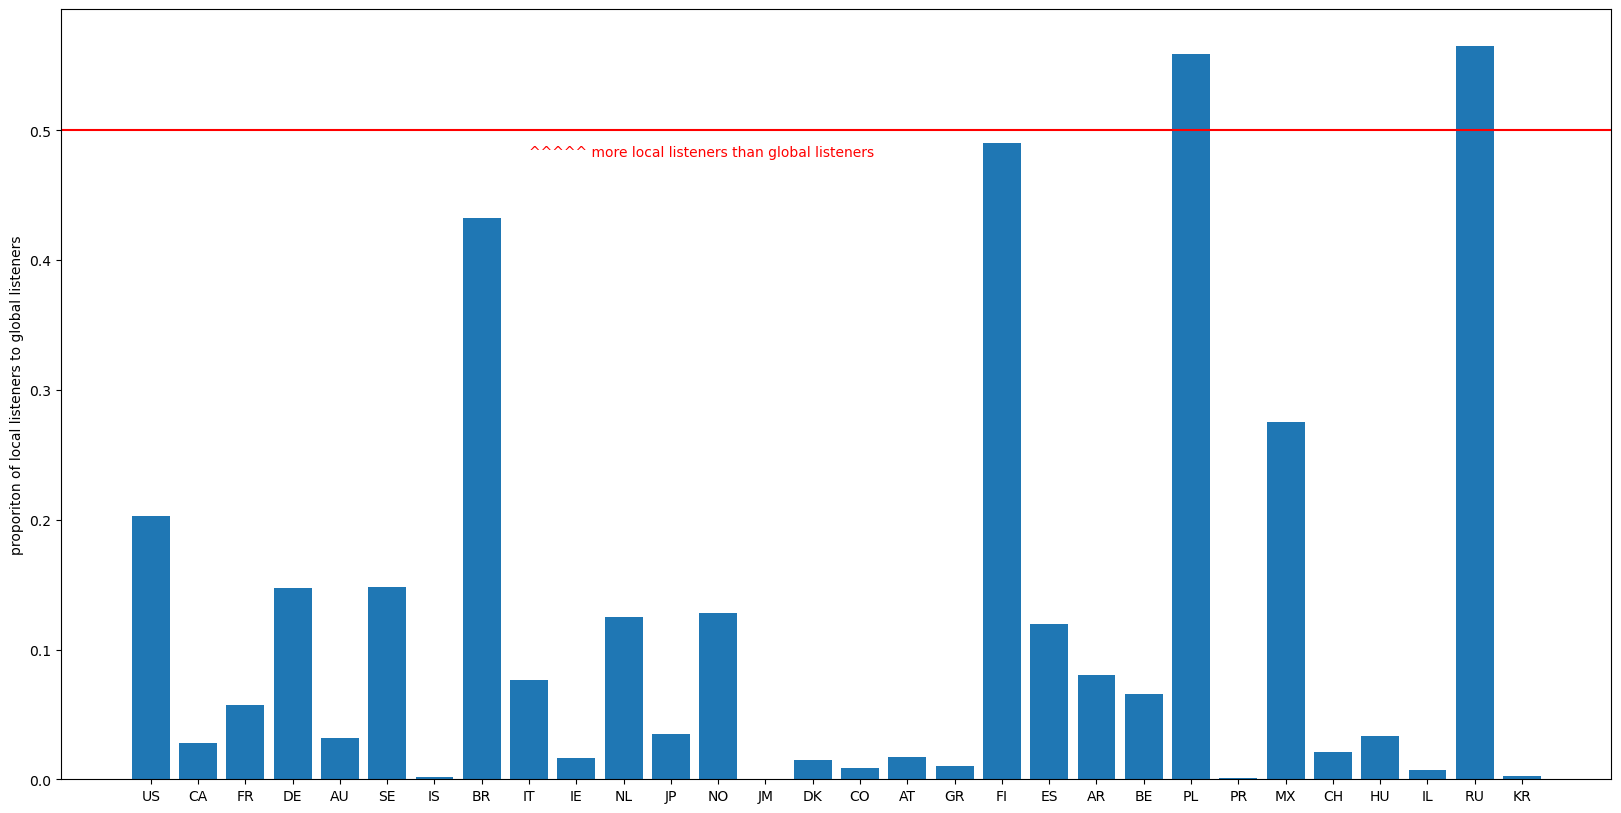

In [145]:
N_FIRST = 30
plt.figure(figsize=(20, 10))
plt.bar(artists_count['artist_country'].head(N_FIRST), artists_count['locality'].head(N_FIRST))

plt.axhline(y=0.5, color='r', linestyle='-')
plt.text(8, .48, '^^^^^ more local listeners than global listeners', color='r')

plt.ylabel('proporiton of local listeners to global listeners')

Text(0, 0.5, 'proporiton of local listeners to global listeners')

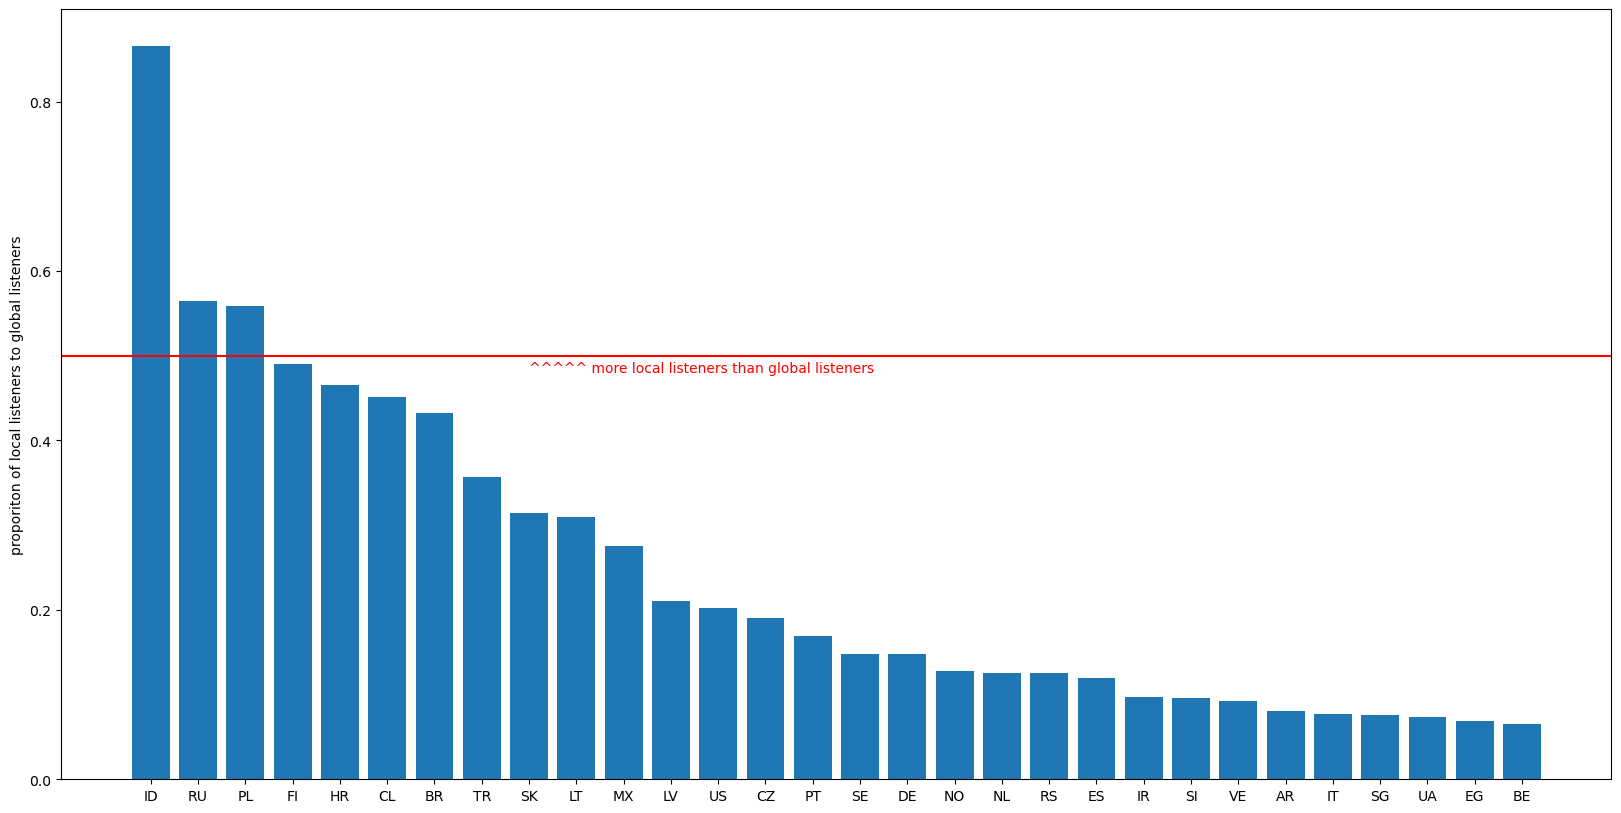

In [156]:
N_FIRST = 30

# sort by count
artists_count = artists_count.sort_values(by='locality', ascending=False).reset_index(drop=True)

plt.figure(figsize=(20, 10))
plt.bar(artists_count['artist_country'].head(N_FIRST), artists_count['locality'].head(N_FIRST))

plt.axhline(y=0.5, color='r', linestyle='-')
plt.text(8, .48, '^^^^^ more local listeners than global listeners', color='r')

plt.ylabel('proporiton of local listeners to global listeners')

Text(0.5, 1.0, 'Top Countries with the highest global listener ratio')

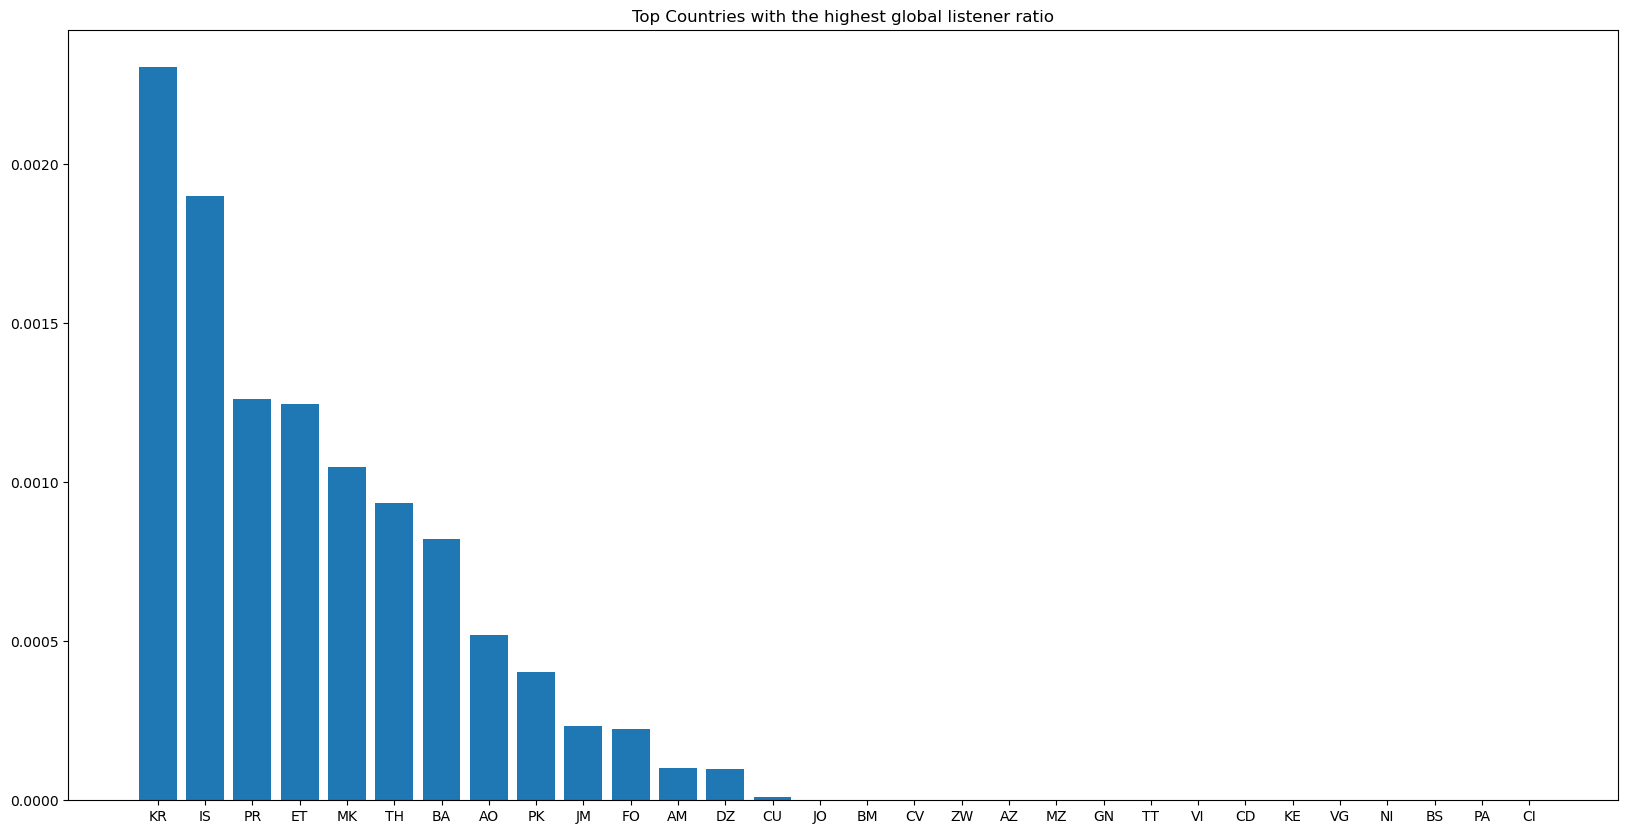

In [154]:
plt.figure(figsize=(20, 10))

temp_df = artists_count.loc[artists_count['count'] > 10000]
plt.bar(temp_df['artist_country'].tail(N_FIRST), temp_df['locality'].tail(N_FIRST))

# hline on 1
# plt.axhline(y=0.002, color='r', linestyle='-')
plt.title('Top Countries with the highest global listener ratio')
# plt.text(0, .48, '^^^^^ more local listeners than global listeners', color='r')

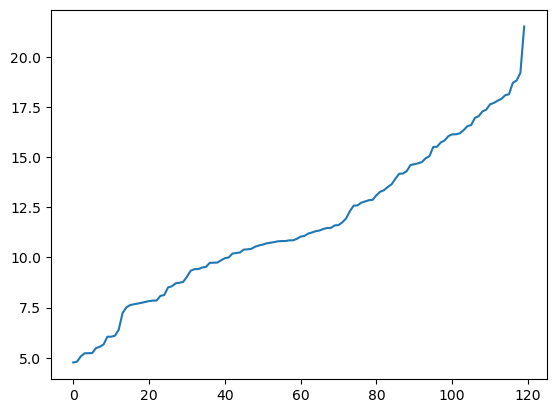

In [132]:
plt.plot(np.log(artists_count.sort_values(by='count', ascending=True)['count'].values))

<Axes: ylabel='Frequency'>

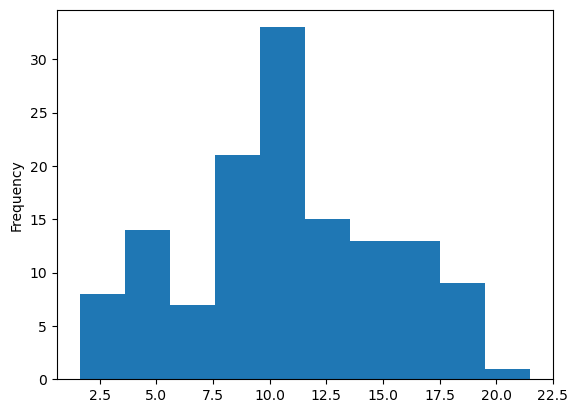

In [113]:

(np.log(artists_count['count'])).plot.hist()

# which ones are more locally listened? which ones are not listened? which ones are more broadly listened? which countries have a few international listeners?

# which gender is most popular in each country? which gender is listened to by other countries but the opposite is false?

# Listeners of which country are older? Do in general younger people tend to listen to the minorities or is the reverse true?

# Ask gustavo to elaborate on this

# Visualization jaleb -> Gephi

# Training Content-based

In [159]:
df_final_grouped.head()

,user_country,user_gender,user_age,artist_gender,artist_country,count
0,AD,f,0-18,f,AD,0
1,AD,f,0-18,f,AF,0
2,AD,f,0-18,f,AG,0
3,AD,f,0-18,f,AI,0
4,AD,f,0-18,f,AL,0


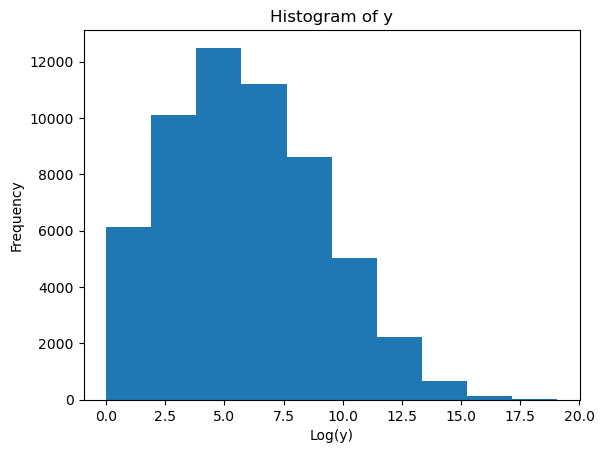

In [160]:
plt.hist(np.log(df_final_grouped[df_final_grouped['count'] > 0.0]['count']))
plt.xlabel('Log(y)')
plt.ylabel('Frequency')
plt.title('Histogram of y')
plt.show()

# there are just a few country pairs that have a lot of interactions


In [210]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder(sparse=False)

y = df_final_grouped['count']
y = np.log(y+1e-30)

x = df_final_grouped.drop(['count', 'user_gender', 'user_age', 'artist_gender'], axis=1)
print(x.shape, y.shape)

columns_to_encode = x.columns
encoder = OneHotEncoder(sparse=False)
encoder.fit(x[columns_to_encode])
encoded_x = encoder.transform(x[columns_to_encode])
encoded_x = pd.DataFrame(encoded_x, columns=encoder.get_feature_names_out(columns_to_encode))
final_df = encoded_x
final_df.iloc[0]

((775392, 2), (775392,))